# Tutoriel de la regression linéaire: [ledatascientist.com](https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
donnees_boston = load_boston()
donnees_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## On affiche la description du jeu de données

In [3]:
donnees_boston.DESCR.split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [4]:
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)
#on affiche les 5 premières lignes
donnees_boston_df.head()
#on créé une nouvelle colonne qui est PRIX. ce qui equivaut à MEDV du jeu de données
donnees_boston_df['PRIX'] = donnees_boston.target
#on vérifie s'il n'y pas des valeurs nulles
donnees_boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRIX       0
dtype: int64

## Etude de la correlation

<AxesSubplot:>

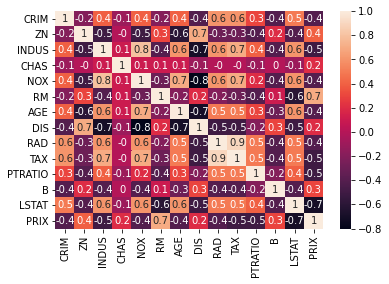

In [5]:
matrice_corr = donnees_boston_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

## Construction du jeu d'entrainement et de test

In [23]:
#on utilise seulement 4 variables explicatives
# X=pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO'], donnees_boston_df['INDUS']], columns = ['LSTAT','RM','TAX','PTRATIO', 'INDUS'])
X=pd.DataFrame(np.c_[donnees_boston_df['ZN'],donnees_boston_df['RM'],donnees_boston_df['B']], columns = ['ZN','RM','B'])
Y = donnees_boston_df['PRIX']
 
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


## Entrainement du modèle

In [24]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

## Evaluation du modèle 

In [25]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 6.380818260075214
le score R2 est 0.5260298361783768


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.947773186100043
le score R2 est 0.6873259693739957
